In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from simulate import simulate
import multiprocessing as mp

### Define jobs to run

In [2]:
jobs = np.zeros((4), dtype=[('N', int), ('N_ill', int), ('Lx', int), ('Ly',int), ('step size',float), ('infection rate',float),\
                           ('pollution rate',float), ('tile infection rate',float), ('flow rate',float), ('time',int)] )

In [3]:
Lx = 30
Ly = 30
stepSize = 0.5
N = 100
N_ill = 1

In [4]:
realisations = 500
tMax = 1000
#---------------N---N_ill--Lx--Ly----step---inf rate--poll rate--tile inf rate--flow rate--time
jobs[0] = tuple([N, N_ill, Lx, Ly, stepSize, 0.01       , 0.01,        0.01,       0,    tMax])
jobs[1] = tuple([N, N_ill, Lx, Ly, stepSize, 0.01       , 0.99,        0.99,       0,    tMax])
jobs[2] = tuple([N, N_ill, Lx, Ly, stepSize, 0.99       , 0.01,        0.01,       0    ,tMax])
jobs[3] = tuple([N, N_ill, Lx, Ly, stepSize, 0.99       , 0.99,        0.99,       0    ,tMax])

lbls = [str(job['infection rate']) + "," + str(job['tile infection rate']) for job in jobs]

In [5]:
%%time
results = []
if __name__ ==  '__main__':
    i=0
    for job in jobs:
        i+=1
        works = [job for i in range(realisations)]
        with mp.Pool(mp.cpu_count()) as pool:
            p_r = pool.map_async(simulate, works)
            results.append(p_r.get())
        print('Job '+str(i)+" Done!")

Job 1 Done!
Job 2 Done!
Job 3 Done!
Job 4 Done!
Wall time: 8min 46s


In [6]:
for i in range(len(results)):
    for j in range(len(results[i])):
        results[i][j] = (results[i][j]['from_per'].cumsum(), results[i][j]['from_env'].cumsum())

### Plot results

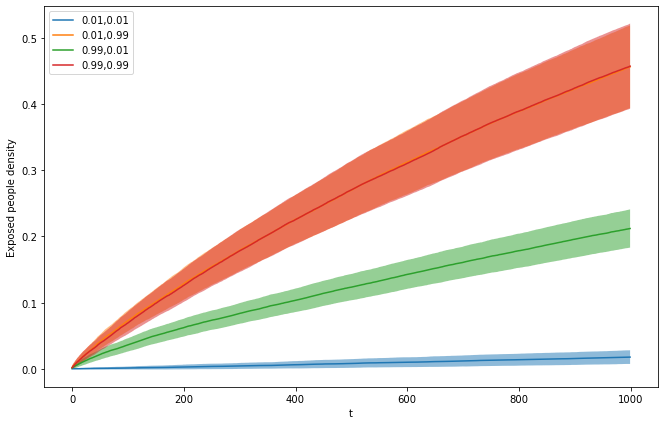

In [7]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results]
errors = [np.std(res, axis=0) for res in results]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(jobs.shape[0]):
    plt.plot(t, np.sum(ts[i], axis=0)/jobs[i][0], label=lbls[i])
    ax.fill_between(t, (np.sum(ts[i], axis=0)+np.sum(errors[i]/2, axis=0))/jobs[i][0], (np.sum(ts[i], axis=0)-np.sum(errors[i]/2, axis=0))/jobs[i][0], alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Exposed people density")
ax.set_title("")
ax.legend(loc='upper left')

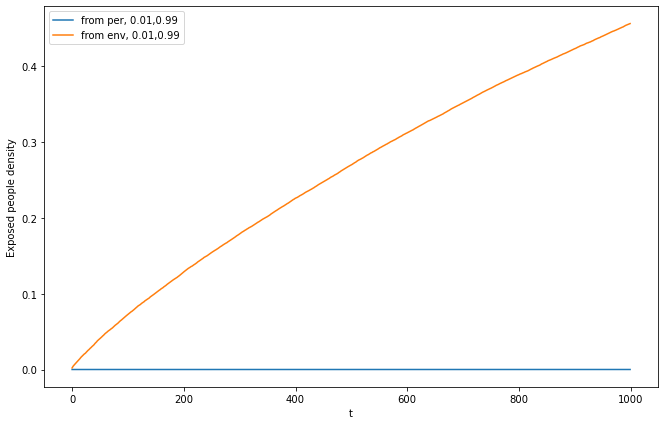

In [12]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results]
errors = [np.std(res, axis=0) for res in results]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(i):
    plt.plot(t, ts[i][0]/jobs[i][0], label='from per, '+lbls[i])
    plt.plot(t, ts[i][1]/jobs[i][0], label='from env, '+lbls[i])
#     ax.fill_between(t, (ts[i][0]+errors[i][0]/2)/jobs[i][0], (ts[i][0]-errors[i][0]/2)/jobs[i][0], alpha=0.5)
#     ax.fill_between(t, (ts[i][1]+errors[i][1]/2)/jobs[i][0], (ts[i][1]-errors[i][1]/2)/jobs[i][0], alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Exposed people density")
ax.set_title("")
ax.legend(loc='upper left')

In [13]:
ts[0]

array([[0.004, 0.004, 0.004, ..., 1.112, 1.112, 1.112],
       [0.   , 0.   , 0.   , ..., 0.65 , 0.654, 0.654]])